# CS 240 EXPLORATORY DATA ANALYSIS Spring 2019 Assignment 1

For this assignment, you need to create an account from kaggle.com and download the following csv (comma separated values) datasets from the following links:

https://www.kaggle.com/karangadiya/fifa19/data#

In [38]:
#Common imports
from datascience import *
import numpy as np

#To plot figures
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.simplefilter('ignore')

## Part 1

In [39]:
fifa =  Table.read_table('data.csv') #creating fifa table from the data.csv

In [40]:
fifa.show(5)

Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",nan,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",nan,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",nan,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",nan,2020,6'4,168lbs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",nan,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,€196.4M


## Part 2

In [41]:
#reporting column names and number of rows in the data.
column_names = fifa.labels
number_of_rows = fifa.num_rows

In [42]:
print('Column names = '+ str(column_names))
print('\n')
print('Number of rows = ' + str(number_of_rows))

Column names = ('Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Rel

## Part 3 

In [43]:
#Sort all the football players by their overall score in descending order, show the top 10 players. 
top_10_players = fifa.sort('Overall',descending = True).select('Name','Overall') 
top_10_players.show(10)

Name,Overall
Cristiano Ronaldo,94
L. Messi,94
Neymar Jr,92
Sergio Ramos,91
L. Suárez,91
L. Modrić,91
E. Hazard,91
K. De Bruyne,91
De Gea,91
David Silva,90


## Part 4

In [44]:
#Sort all the football players by their overall score in ascending order and show the first 100 players.
least_100_players = fifa.sort('Overall',descending = False).select('Name','Overall')
least_100_players.show(100)

Name,Overall
G. Nugent,46
Zhang Yufeng,47
C. Ehlich,47
L. Collins,47
A. Kaltner,47
L. Watkins,47
J. Norville-Williams,47
S. Squire,47
N. Fuentes,47
J. Milli,47


## Part 5

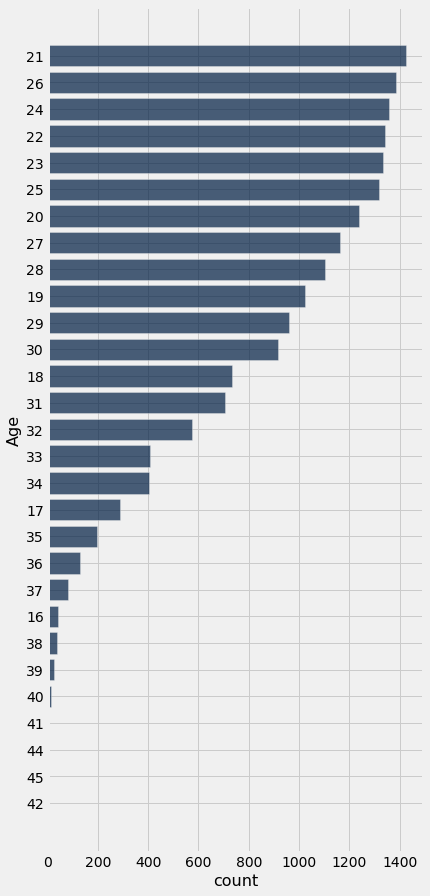

In [45]:
count_age = fifa.group('Age') #finding the distribution of football players by Age
count_age.sort(1, descending = True).barh(0) #plot the bar chart (barh) of Age distribution where bars are sorted in descending order based on the count of the players.

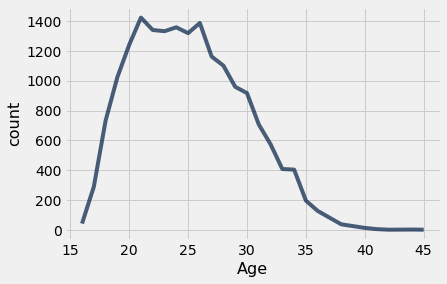

In [46]:
count_age.plot('Age','count') #line graph where x-axis is age and y-axis is the count of the players.

## Part 6

In [47]:
#top 10 players and last 10 players based on Overall scores, both tables will include only Name, Age, Overall, and Wage columns.
top_players = fifa.select('Name','Age','Overall','Wage').sort('Overall',descending = True) 
bottom_players = fifa.select('Name','Age','Overall','Wage').sort('Overall',descending = False) 

In [48]:
top_players.show(10)

Name,Age,Overall,Wage
Cristiano Ronaldo,33,94,€405K
L. Messi,31,94,€565K
Neymar Jr,26,92,€290K
Sergio Ramos,32,91,€380K
L. Suárez,31,91,€455K
L. Modrić,32,91,€420K
E. Hazard,27,91,€340K
K. De Bruyne,27,91,€355K
De Gea,27,91,€260K
David Silva,32,90,€285K


In [49]:
bottom_players.show(10)

Name,Age,Overall,Wage
G. Nugent,16,46,€1K
Zhang Yufeng,20,47,€1K
C. Ehlich,19,47,€1K
L. Collins,17,47,€1K
A. Kaltner,18,47,€1K
L. Watkins,18,47,€1K
J. Norville-Williams,18,47,€1K
S. Squire,18,47,€1K
N. Fuentes,18,47,€1K
J. Milli,18,47,€1K


## Part 7

In [50]:
#taking top 100 football players based on their overall scores.
club_barh = fifa.sort('Overall',descending = True).take(np.arange(100))

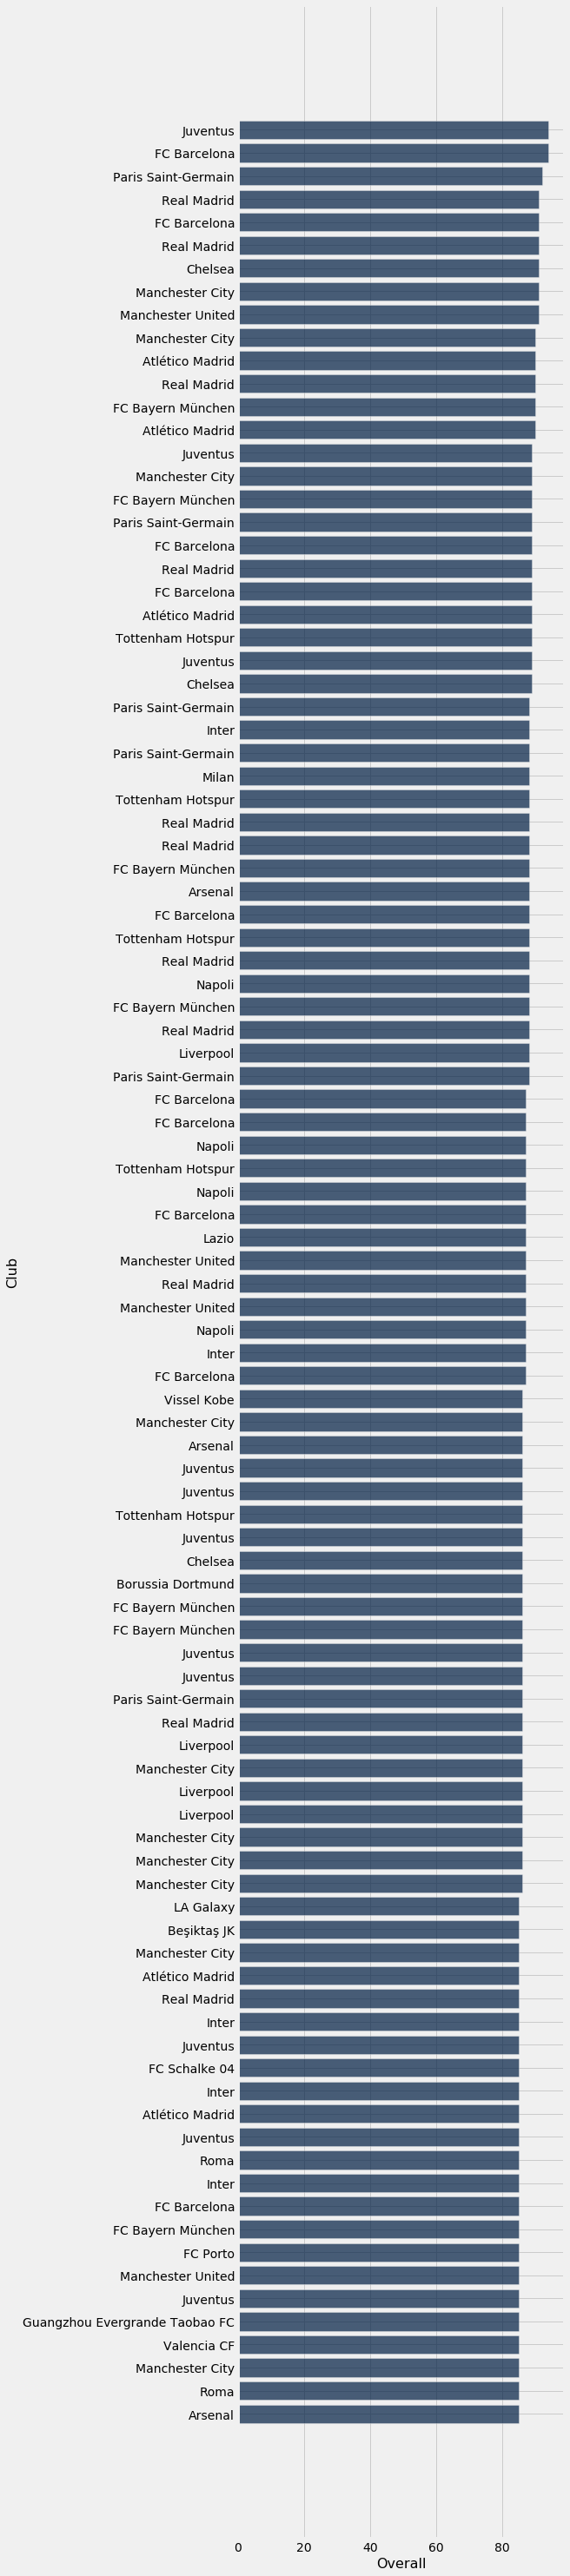

In [51]:
club_barh.barh('Club','Overall') #plot the bar graph of Club column in descending order.

In [52]:
club_barh.where('Club','Beşiktaş JK').select('Name') #It appears that there is a player in this list from Turkish club Beşiktaş.

Name
Pepe


## Part 8

In [53]:
#Change Value and Wage column such that the values are in numerical format. 
#For example, Cristiano Ronaldo’s wage is €405K, then you should change €405K into a number, 405000.

def transform(x):
    
    if x[-1]=='K':
        
        return int(float(x[1:].replace('K',''))*1000)
    
    elif x[-1]=='M':
        
        return int(float(x[1:].replace('M',''))*1000000)
    
    return int(float(x[1:]))

fifa_updated = fifa.select("Name", "Age", "Nationality", "Overall", "Club", "Value", "Wage","Position").with_column("Value",fifa.apply(transform,'Value')).with_column("Wage",fifa.apply(transform,'Wage'))

In [54]:
fifa_updated.show(10)

Name,Age,Nationality,Overall,Club,Value,Wage,Position
L. Messi,31,Argentina,94,FC Barcelona,110500000,565000,RF
Cristiano Ronaldo,33,Portugal,94,Juventus,77000000,405000,ST
Neymar Jr,26,Brazil,92,Paris Saint-Germain,118500000,290000,LW
De Gea,27,Spain,91,Manchester United,72000000,260000,GK
K. De Bruyne,27,Belgium,91,Manchester City,102000000,355000,RCM
E. Hazard,27,Belgium,91,Chelsea,93000000,340000,LF
L. Modrić,32,Croatia,91,Real Madrid,67000000,420000,RCM
L. Suárez,31,Uruguay,91,FC Barcelona,80000000,455000,RS
Sergio Ramos,32,Spain,91,Real Madrid,51000000,380000,RCB
J. Oblak,25,Slovenia,90,Atlético Madrid,68000000,94000,GK


## Part 9

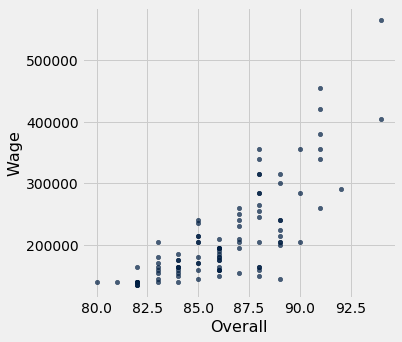

In [55]:
top_100_players_w = fifa_updated.sort('Wage',descending = True).take(np.arange(100)) #Select the top 100 players based on their Wage.
top_100_players_w.scatter('Overall','Wage') #Overall vs. Wage scatter plot

There is a strong association between two variables in positive interaction, as x increases y increases positive non-linear manner.

## Part 10 

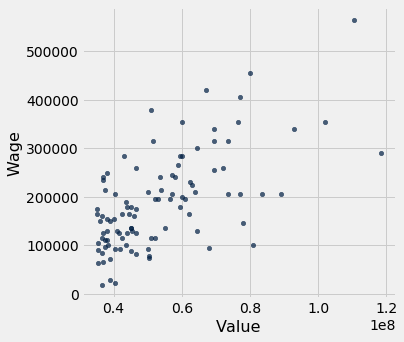

In [56]:
top_100_players_v = fifa_updated.sort('Value',descending = True).take(np.arange(100)) #Select the top 100 players based on their Value
top_100_players_v.scatter('Value','Wage') #Value vs. Wage scatter plot

There is a positive association, there is a close to linear (less-severe) dependency interaction between variables.

## Part 11

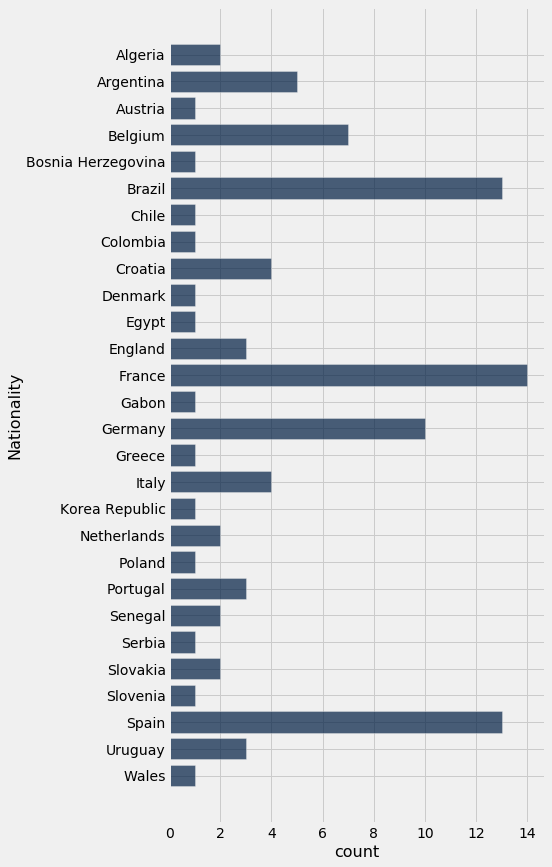

In [57]:
#In top 100 players with highest Value, draw bar chart to show the distribution of Nationality of players.
top_100_players_v.group('Nationality').barh('Nationality','count')

## Part 12

In [58]:
fifa_updated.select('Nationality','Wage').group('Nationality',np.average).sort('Wage average',descending = True).row(0) #Dominican Republic has the highest average Wage.

Row(Nationality='Dominican Republic', Wage average=71000.0)

## Part 13

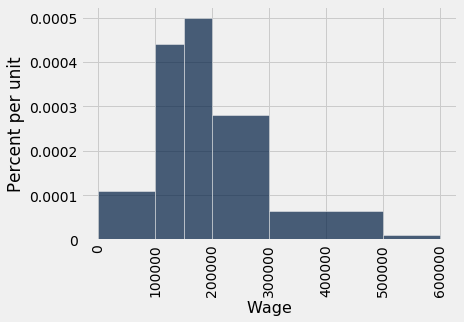

In [59]:
#Selecting top 100 players based on ‘Overall’ score and plot a histogram of their Wages using my_bins.
histogram = fifa_updated.sort('Overall',descending = True).take(np.arange(100))
my_bins = make_array(0,100000,150000,200000,300000,500000,600000)
histogram.hist('Wage',bins = my_bins)